### K-Means Clusterinf for Portfolio Diversification

In [85]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

In [116]:
files = glob.glob("./csv_dowjones/*csv")

In [117]:
files

['./csv_dowjones\\AAPL.csv',
 './csv_dowjones\\AXP.csv',
 './csv_dowjones\\BA.csv',
 './csv_dowjones\\CAT.csv',
 './csv_dowjones\\CSCO.csv',
 './csv_dowjones\\CVX.csv',
 './csv_dowjones\\DIS.csv',
 './csv_dowjones\\DWDP.csv',
 './csv_dowjones\\GS.csv',
 './csv_dowjones\\HD.csv',
 './csv_dowjones\\IBM.csv',
 './csv_dowjones\\INTC.csv',
 './csv_dowjones\\JNJ.csv',
 './csv_dowjones\\JPM.csv',
 './csv_dowjones\\KO.csv',
 './csv_dowjones\\MCD.csv',
 './csv_dowjones\\MMM.csv',
 './csv_dowjones\\MRK.csv',
 './csv_dowjones\\MSFT.csv',
 './csv_dowjones\\NKE.csv',
 './csv_dowjones\\PFE.csv',
 './csv_dowjones\\PG.csv',
 './csv_dowjones\\TRV.csv',
 './csv_dowjones\\UNH.csv',
 './csv_dowjones\\UTX.csv',
 './csv_dowjones\\V.csv',
 './csv_dowjones\\VZ.csv',
 './csv_dowjones\\WBA.csv',
 './csv_dowjones\\WMT.csv',
 './csv_dowjones\\XOM.csv']

In [118]:
import os
import pandas as pd

# Create an empty list to hold the data frames
data_frames = []

# Loop through the list of file names
for filename in files:
    try:
        # Read the CSV file into a data frame, skipping any rows with errors
        df = pd.read_csv(filename, index_col=None, header=0, on_bad_lines='skip')
        # Add a new column to the data frame with the file name
        df['filename'] = os.path.basename(filename)
        # Append the data frame to the list
        data_frames.append(df)
    except pd.errors.ParserError as e:
        print(f"Error parsing {filename}: {e}")

# Combine the data frames into a single data frame
combined_df = pd.concat(data_frames, ignore_index=True)

# Set the index to the 'filename' column
combined_df.set_index('filename', inplace=True)



In [119]:
combined_df.head()

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
filename,,,,,,,,,,,,
AAPL.csv,2014-02-21,69.9727,70.2061,68.8967,68.9821,69757247,9965321,-0.774858,-1.111,69.4256,"Feb 21, 14",0.000000
AAPL.csv,2014-02-24,68.7063,69.5954,68.6104,69.2841,72364950,10337850,0.302061,0.438,69.1567,"Feb 24, 14",0.004378
AAPL.csv,2014-02-25,69.5245,69.5488,68.4239,68.5631,58247350,8321050,-0.721010,-1.041,68.9153,"Feb 25, 14",-0.006074
AAPL.csv,2014-02-26,68.7667,68.9492,67.7147,67.9446,69131286,9875898,-0.618575,-0.902,68.1373,"Feb 26, 14",-0.015040
AAPL.csv,2014-02-27,67.9170,69.4457,67.7738,69.2999,75557321,10793903,1.355300,1.995,68.8615,"Feb 27, 14",0.004607


In [120]:
combined_df.info() #checking for number of rows and columns

<class 'pandas.core.frame.DataFrame'>
Index: 36850 entries, AAPL.csv to XOM.csv
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              36850 non-null  object 
 1   open              36850 non-null  float64
 2   high              36850 non-null  float64
 3   low               36850 non-null  float64
 4   close             36850 non-null  float64
 5   volume            36850 non-null  int64  
 6   unadjustedVolume  36850 non-null  int64  
 7   change            36850 non-null  float64
 8   changePercent     36850 non-null  float64
 9   vwap              36850 non-null  float64
 10  label             36850 non-null  object 
 11  changeOverTime    36850 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.7+ MB


In [121]:
combined_df.isna().sum() # checking for missing values

date                0
open                0
high                0
low                 0
close               0
volume              0
unadjustedVolume    0
change              0
changePercent       0
vwap                0
label               0
changeOverTime      0
dtype: int64

In [122]:
# Calculate percent change
combined_df['pct_change'] = combined_df['close'].pct_change()

# Calculate monthly mean return
combined_df['mean_return'] = combined_df['close'].pct_change(periods=50) * 50

# Calculate monthly variance
combined_df['variance'] = combined_df['close'].rolling(50).var() * 50

# Print the updated dataframe
combined_df.head()

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,pct_change,mean_return,variance
filename,,,,,,,,,,,,,,,
AAPL.csv,2014-02-21,69.9727,70.2061,68.8967,68.9821,69757247,9965321,-0.774858,-1.111,69.4256,"Feb 21, 14",0.000000,NaN,NaN,NaN
AAPL.csv,2014-02-24,68.7063,69.5954,68.6104,69.2841,72364950,10337850,0.302061,0.438,69.1567,"Feb 24, 14",0.004378,0.004378,NaN,NaN
AAPL.csv,2014-02-25,69.5245,69.5488,68.4239,68.5631,58247350,8321050,-0.721010,-1.041,68.9153,"Feb 25, 14",-0.006074,-0.010406,NaN,NaN
AAPL.csv,2014-02-26,68.7667,68.9492,67.7147,67.9446,69131286,9875898,-0.618575,-0.902,68.1373,"Feb 26, 14",-0.015040,-0.009021,NaN,NaN
AAPL.csv,2014-02-27,67.9170,69.4457,67.7738,69.2999,75557321,10793903,1.355300,1.995,68.8615,"Feb 27, 14",0.004607,0.019947,NaN,NaN


In [123]:
combined_df.info()# Checking after transformations

<class 'pandas.core.frame.DataFrame'>
Index: 36850 entries, AAPL.csv to XOM.csv
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              36850 non-null  object 
 1   open              36850 non-null  float64
 2   high              36850 non-null  float64
 3   low               36850 non-null  float64
 4   close             36850 non-null  float64
 5   volume            36850 non-null  int64  
 6   unadjustedVolume  36850 non-null  int64  
 7   change            36850 non-null  float64
 8   changePercent     36850 non-null  float64
 9   vwap              36850 non-null  float64
 10  label             36850 non-null  object 
 11  changeOverTime    36850 non-null  float64
 12  pct_change        36849 non-null  float64
 13  mean_return       36800 non-null  float64
 14  variance          36801 non-null  float64
dtypes: float64(11), int64(2), object(2)
memory usage: 4.5+ MB


In [124]:
combined_df.isna().sum() # checking for na values after transformations due to rolling average and variance calculations

date                 0
open                 0
high                 0
low                  0
close                0
volume               0
unadjustedVolume     0
change               0
changePercent        0
vwap                 0
label                0
changeOverTime       0
pct_change           1
mean_return         50
variance            49
dtype: int64

In [125]:
combined_df.dropna(inplace=True) # dropping missing values permanentantely

In [126]:
combined_df.isna().sum() 

date                0
open                0
high                0
low                 0
close               0
volume              0
unadjustedVolume    0
change              0
changePercent       0
vwap                0
label               0
changeOverTime      0
pct_change          0
mean_return         0
variance            0
dtype: int64

Text(0, 0.5, 'Inertia or Sum of Squared Error - SSE')

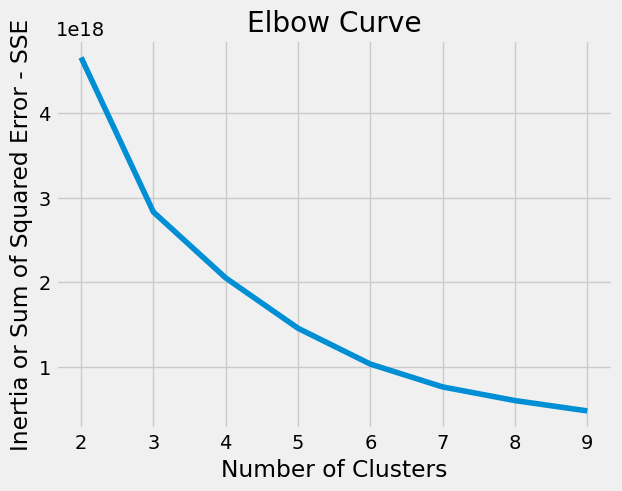

In [127]:
#using elbow method to determine the number of clusters to use

X = combined_df[['mean_return','variance','vwap','volume','changeOverTime', 'changePercent','change','pct_change','unadjustedVolume']].values
inertia_list = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)#sum of squares errors or residuals

# plot of elbow method

plt.plot(range(2,10), inertia_list)
plt.title("Elbow Curve")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia or Sum of Squared Error - SSE')
       

In [128]:
# Get and show the labels or groups for each stock:
# Running K-means with 3 centroids

kmeans = KMeans(n_clusters = 5).fit(X)
labels = kmeans.labels_
labels

array([3, 1, 3, ..., 0, 0, 0])

In [129]:
# count the number of unique elements in the array
unique_elements = len(np.unique(labels))

# print the result
print("There are", unique_elements, "different numbers in the array.")

There are 5 different numbers in the array.


In [130]:
# add labels to data set for stock identification
combined_df['cluster_labels'] = labels


In [132]:
combined_df = combined_df[['cluster_labels','open','high', 'low',
                           'close','volume','mean_return','variance','vwap','changeOverTime',
                           'changePercent','change','pct_change','unadjustedVolume']]

In [133]:
combined_df.head()

,cluster_labels,open,high,low,close,volume,mean_return,variance,vwap,changeOverTime,changePercent,change,pct_change,unadjustedVolume
filename,,,,,,,,,,,,,,
AAPL.csv,3,77.5042,78.9305,77.4858,78.9252,71766758,7.207015,442.276577,78.4390,0.144140,1.414,1.100600,0.014142,10252394
AAPL.csv,1,79.0355,79.3783,78.0650,78.0650,93641373,6.336880,491.681880,79.0306,0.131670,-1.090,-0.860223,-0.010899,13377339
AAPL.csv,3,78.1753,78.4432,77.1877,77.7918,70715988,6.730078,530.852344,77.7288,0.127710,-0.350,-0.273169,-0.003500,10102284
AAPL.csv,3,77.3173,78.1269,77.0741,77.2831,57574363,6.872143,556.209097,77.7606,0.120336,-0.654,-0.508697,-0.006539,8224909
AAPL.csv,3,76.8297,77.0544,76.2763,76.9614,72899498,5.527786,582.434771,76.6190,0.115672,-0.416,-0.321688,-0.004163,10414214


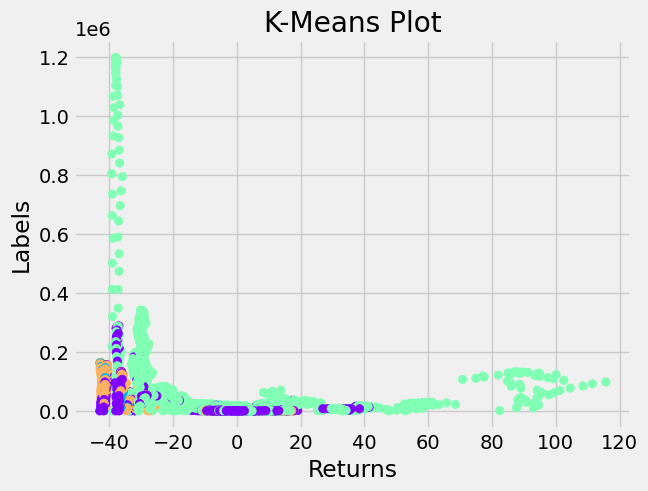

In [144]:
# Plotting the clusters
plt.scatter(X[:,0],X[:,1], c = labels, cmap = "rainbow")
plt.title("K-Means Plot")
plt.xlabel('Returns')
plt.ylabel("Labels")

plt.show()

Now based on the stock labels we can choose stocks from the different clusters to ensure the stocks are different enough and avoid putting all eggs in one basket.
The purple color dots have the stocks that have been labled 0, the red ones belong to 1 and the green belongs to label 2



In [ ]:
'mean_return','variance','vwap','volume','changeOverTime', 'changePercent','change','pct_change','unadjustedVolume']]